# CREDIT CARD FRAUD DETECTION

In [1]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../data/training_data/raw_data/credit_card_transaction_data.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.88,0.31,1.95,1.00,1.00,0.00,0.00,0.00
1,10.83,0.18,1.29,1.00,0.00,0.00,0.00,0.00
2,5.09,0.81,0.43,1.00,0.00,0.00,1.00,0.00
3,2.25,5.60,0.36,1.00,1.00,0.00,1.00,0.00
4,44.19,0.57,2.22,1.00,1.00,0.00,1.00,0.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [23]:
df[['fraud']].value_counts()

fraud
0.00     912597
1.00      87403
dtype: int64

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.00,26.63,65.39,0.00,3.88,9.97,25.74,10632.72
distance_from_last_transaction,1000000.00,5.04,25.84,0.00,0.30,1.00,3.36,11851.10
ratio_to_median_purchase_price,1000000.00,1.82,2.80,0.00,0.48,1.00,2.10,267.80
repeat_retailer,1000000.00,0.88,0.32,0.00,1.00,1.00,1.00,1.00
used_chip,1000000.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
used_pin_number,1000000.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
online_order,1000000.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
fraud,1000000.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00


In [25]:
#a quick look at mean value of the features for fraudulent and non-fraudulent transactions
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.00,22.83,4.30,1.42,0.88,0.36,0.11,0.62
1.00,66.26,12.71,6.01,0.88,0.26,0.00,0.95


<Axes: xlabel='fraud', ylabel='count'>

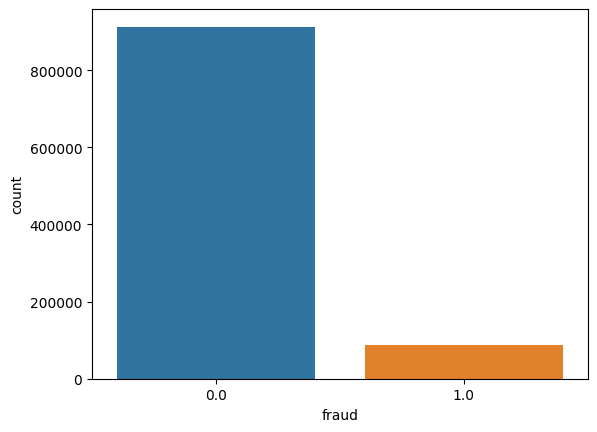

In [26]:
#visualizing the count plot and the unbalanced nature of the dataset
sns.countplot(x = 'fraud', data = df)

In [27]:
#correlation of each of the variables with fraud
df.corr()['fraud'].sort_values()

used_pin_number                  -0.10
used_chip                        -0.06
repeat_retailer                  -0.00
distance_from_last_transaction    0.09
distance_from_home                0.19
online_order                      0.19
ratio_to_median_purchase_price    0.46
fraud                             1.00
Name: fraud, dtype: float64

<Axes: >

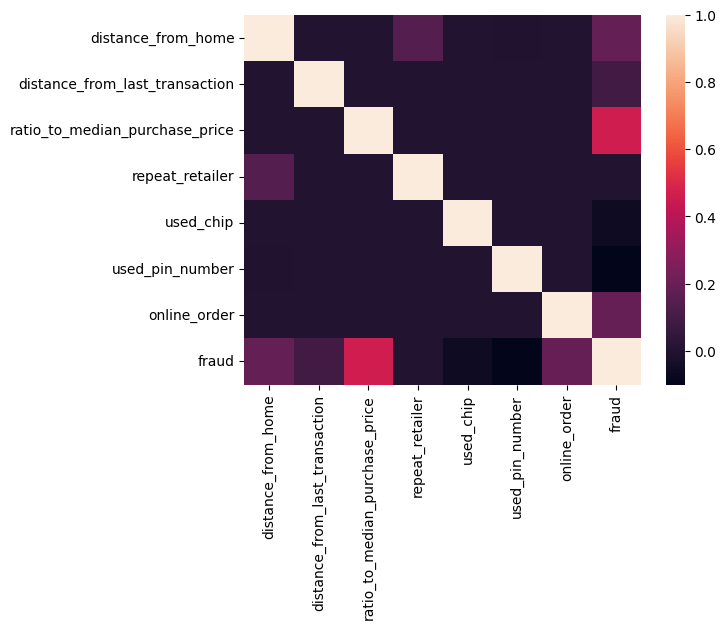

In [28]:
sns.heatmap(df.corr())

<Axes: >

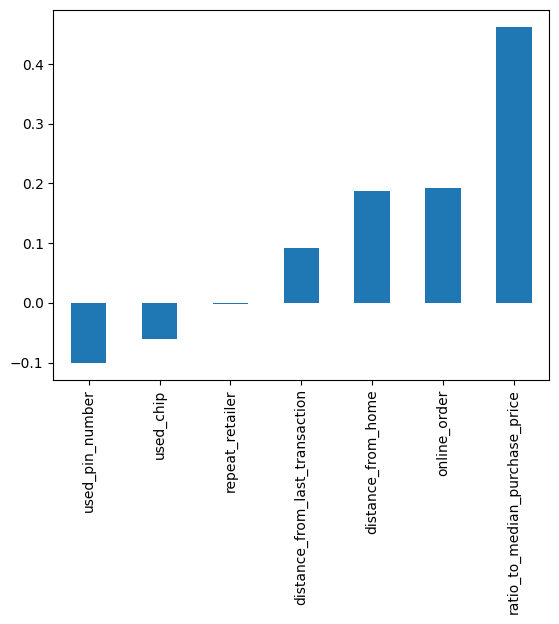

In [29]:
#visualize the correlation
df.corr()['fraud'][:-1].sort_values().plot(kind='bar')

### We further explore the variables with significant correlations with fraud

<Axes: xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

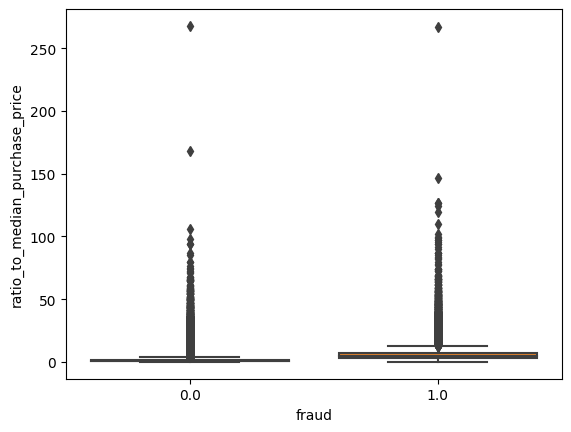

In [30]:
#ration to median purchase price higher for fraudulent transactions
sns.boxplot(x='fraud',y='ratio_to_median_purchase_price',data=df)

<Axes: xlabel='fraud', ylabel='count'>

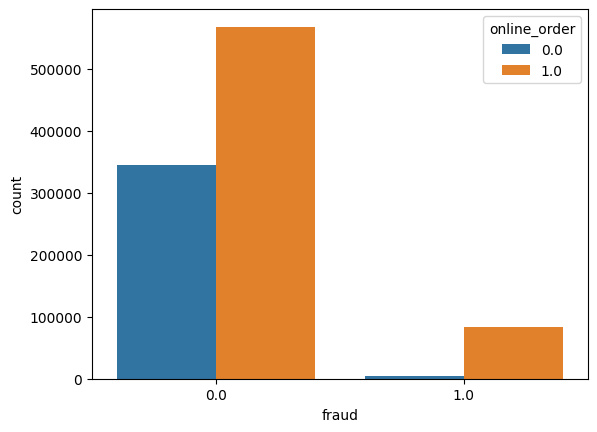

In [31]:
#online orders are more likely to be fraudulent
sns.countplot(x='fraud',hue='online_order',data=df)

<Axes: xlabel='fraud', ylabel='count'>

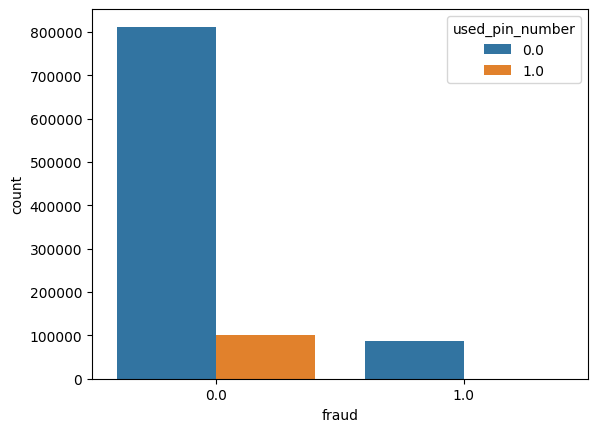

In [32]:
#transactions are less likely to be fraudulent when pin numbers are used
sns.countplot(x='fraud',hue='used_pin_number',data=df)

<Axes: xlabel='fraud', ylabel='distance_from_home'>

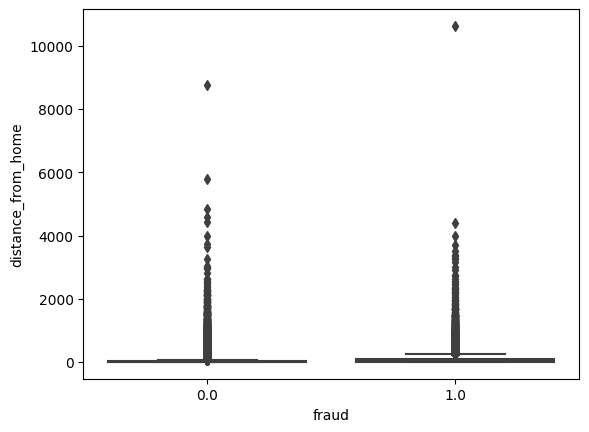

In [34]:
sns.boxplot(x='fraud',y='distance_from_home',data=df)

# DATA PREPROCESSING

In [3]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state = 43)

# MODEL TRAINING
#### I shall first fit several model to the dataset to select the best for finetunning.

In [9]:
#clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
#models,predictions=clf.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [33:49<00:00, 69.98s/it]  


In [10]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
KNeighborsClassifier               1.00               0.99     0.99      1.00   
LGBMClassifier                     1.00               0.99     0.99      1.00   
SVC                                1.00               0.99     0.99      1.00   
ExtraTreeClassifier                1.00               0.98     0.98      1.00   
NearestCentroid             

### XGBoost classifier is second best but it has significantly better training time and not noticeable different hence it will be chosen. Also, the model  

In [5]:
fraud_model = xgb.XGBClassifier()

In [6]:
fraud_model.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.99994
[1]	validation_0-aucpr:0.99994
[2]	validation_0-aucpr:0.99994
[3]	validation_0-aucpr:0.99994
[4]	validation_0-aucpr:0.99994
[5]	validation_0-aucpr:0.99994
[6]	validation_0-aucpr:0.99994
[7]	validation_0-aucpr:0.99994
[8]	validation_0-aucpr:0.99994
[9]	validation_0-aucpr:0.99994
[10]	validation_0-aucpr:0.99994
[11]	validation_0-aucpr:0.99994
[12]	validation_0-aucpr:0.99994
[13]	validation_0-aucpr:0.99994
[14]	validation_0-aucpr:0.99994
[15]	validation_0-aucpr:0.99994
[16]	validation_0-aucpr:0.99994
[17]	validation_0-aucpr:0.99994
[18]	validation_0-aucpr:0.99994
[19]	validation_0-aucpr:0.99994
[20]	validation_0-aucpr:0.99994
[21]	validation_0-aucpr:0.99994
[22]	validation_0-aucpr:0.99994
[23]	validation_0-aucpr:0.99994
[24]	validation_0-aucpr:0.99994
[25]	validation_0-aucpr:0.99994
[26]	validation_0-aucpr:0.99994
[27]	validation_0-aucpr:0.99994
[28]	validation_0-aucpr:0.99994
[29]	validation_0-aucpr:0.99994
[30]	validation_0-aucpr:0.99994
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [7]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score, make_scorer, f1_score, precision_score, recall_score

In [8]:
import matplotlib.pyplot as plt

In [9]:
predictions = fraud_model.predict(X_test)

In [10]:
print(type(predictions))

<class 'numpy.ndarray'>


In [11]:
predictions

array([0, 0, 1, ..., 0, 1, 0])

In [16]:
X_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
240118,32.71,1.17,1.61,1.00,0.00,0.00,1.00
252671,13.02,0.19,0.94,1.00,0.00,0.00,1.00
17437,51.01,0.70,4.27,1.00,0.00,0.00,1.00
830281,10.96,2.32,1.64,1.00,1.00,0.00,1.00
496497,36.80,0.97,20.25,1.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...
247120,26.44,0.60,7.39,1.00,0.00,0.00,0.00
754971,12.21,3.32,0.69,1.00,0.00,0.00,1.00
935649,80.74,0.17,1.37,1.00,0.00,0.00,1.00
947639,116.13,3.90,0.77,1.00,0.00,0.00,1.00


In [14]:
pd.DataFrame(predictions)

,0
0,0
1,0
2,1
3,0
4,0
...,...
299995,0
299996,0
299997,0
299998,1


In [24]:
X_test['predictions'] = predictions.tolist()

In [25]:
X_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,predictions
240118,32.71,1.17,1.61,1.00,0.00,0.00,1.00,0
252671,13.02,0.19,0.94,1.00,0.00,0.00,1.00,0
17437,51.01,0.70,4.27,1.00,0.00,0.00,1.00,1
830281,10.96,2.32,1.64,1.00,1.00,0.00,1.00,0
496497,36.80,0.97,20.25,1.00,1.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...
247120,26.44,0.60,7.39,1.00,0.00,0.00,0.00,0
754971,12.21,3.32,0.69,1.00,0.00,0.00,1.00,0
935649,80.74,0.17,1.37,1.00,0.00,0.00,1.00,0
947639,116.13,3.90,0.77,1.00,0.00,0.00,1.00,1


In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,predictions)

array([[273779,      0],
       [     3,  26218]], dtype=int64)

In [37]:
param_grid = {
    "max_depth":[2,3,4,5],
    "learning_rate":[0.01, 0.05, 0.1, 0.5, 1.0],
    "gamma":[0, 0.25, 0.5, 0.75, 1.0],
    "reg_lambda":[0,1.0,10.0,20,100],
}

In [41]:
optima_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective="binary:logistic",
                                    use_label_encoder=False,
                                    seed=42,
                                    subsample=0.9,
                                    colsample_bytree=0.5),
    param_grid=param_grid,
    scoring="roc_auc",
    verbose=0,
    n_jobs=10,
    cv=3
)

In [ ]:
optima_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric="auc",
                  eval_set=[(X_test,y_test)],
                  verbose=False
)
print(optima_params.best_params_)

In [26]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.88,0.31,1.95,1.00,1.00,0.00,0.00,0.00
1,10.83,0.18,1.29,1.00,0.00,0.00,0.00,0.00
2,5.09,0.81,0.43,1.00,0.00,0.00,1.00,0.00
3,2.25,5.60,0.36,1.00,1.00,0.00,1.00,0.00
4,44.19,0.57,2.22,1.00,1.00,0.00,1.00,0.00


In [30]:
transaction_data_set_one = df.drop('fraud', axis=1)

In [32]:
transaction_data_set_one.to_csv('../data/prediction_data/prediction_input/transaction_data_set_one.csv')